# Data Wrangling Homework

In the spirit of warming up for final projects, this weeks homework will be somewhat open-ended. Actually, it will more like closed-ended and open-middled...

Different doctors with different backgrounds, trained in different places, etc., might behave differently. In other words, one doctor might have various biases relative to another. We hope not, at least in critical situations, but doctors are people too.

Your job is to determine whether the 4 doctors in our data set are behaving essentially the same with respect to measuring clump thickness, bland chromatin, and diagnosis of tumor type, or whether any one of them seems to be different. 

The submission should be a pdf that makes your case as though to a boss/hospital administrator; it should make the case in enough detail to be convincing, but not in such detail that your boss will hate you. For example, one doctor-to-doctor comparison can be described in some detail, but the rest can be summarized with "Similar comparisons were made for ..."

Your final conclusion should be whether 1) everything seems okay with respect to the doctors or 2) if there are any red flags that might warrent further scrutiny.

Do the analysis with an open mind. It's not good to enter an analysis with a pre-conceived notion of what you may or may not find.

---

In [1]:
import numpy as np
import pandas as pd

Use our load & clean function from the pre-class notebook

In [2]:
def bcd_load_clean():
    bcd = pd.read_csv('./data/breast_cancer_data.csv')
    bcd['patient_id'] = bcd['patient_id'].astype('string')
    bcd['doctor_name'] = bcd['doctor_name'].str.split().str[1]
    bcd['bare_nuclei'] = bcd['bare_nuclei'].replace('?', '')
    bcd['bare_nuclei'] = pd.to_numeric(bcd['bare_nuclei'])
    
    return bcd

In [3]:
bcd = bcd_load_clean()

Check the column names (mainly so we can cut & paste the names of the columns to drop)

In [4]:
bcd.columns

Index(['patient_id', 'clump_thickness', 'cell_size_uniformity',
       'cell_shape_uniformity', 'marginal_adhesion', 'single_ep_cell_size',
       'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class',
       'doctor_name'],
      dtype='object')

Drop all the stuff we don't need.

In [5]:
bcd2 = bcd.drop(labels = ['patient_id', 'cell_size_uniformity', 'cell_shape_uniformity', 
                          'cell_shape_uniformity', 'marginal_adhesion', 'single_ep_cell_size',
                          'bare_nuclei', 'normal_nucleoli', 'mitoses'],
                axis = 1,             # we're selecting column - default is rows
                inplace = False)      # we could modify bcd itself with True

In [6]:
bcd2.columns

Index(['clump_thickness', 'bland_chromatin', 'class', 'doctor_name'], dtype='object')

Now we need to start looking at stuff, so let's import some plotting tools.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

Look at the relationship between the variables per tumor type.

<Axes: xlabel='clump_thickness', ylabel='bland_chromatin'>

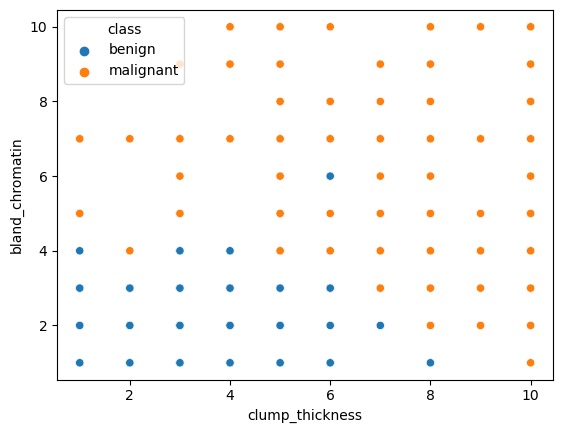

In [8]:
sns.scatterplot(bcd2, x='clump_thickness', y='bland_chromatin', hue='class')

Okay, so it's pretty clear that small values of both variables correspond to benign...

<Axes: xlabel='doctor_name', ylabel='clump_thickness'>

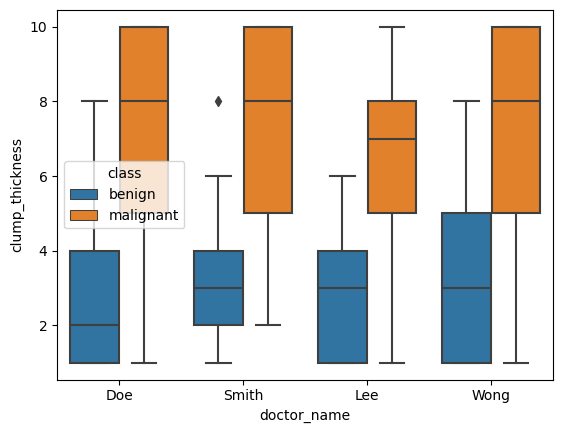

In [9]:
sns.boxplot(data=bcd2, x='doctor_name', y='clump_thickness', hue='class')

<Axes: xlabel='doctor_name', ylabel='bland_chromatin'>

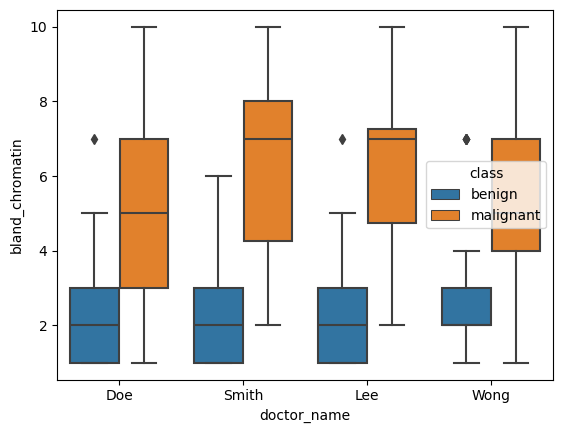

In [10]:
sns.boxplot(data=bcd2, x='doctor_name', y='bland_chromatin', hue='class')

/Users/lkcormack/anaconda3/envs/FDSII/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lkcormack/anaconda3/envs/FDSII/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


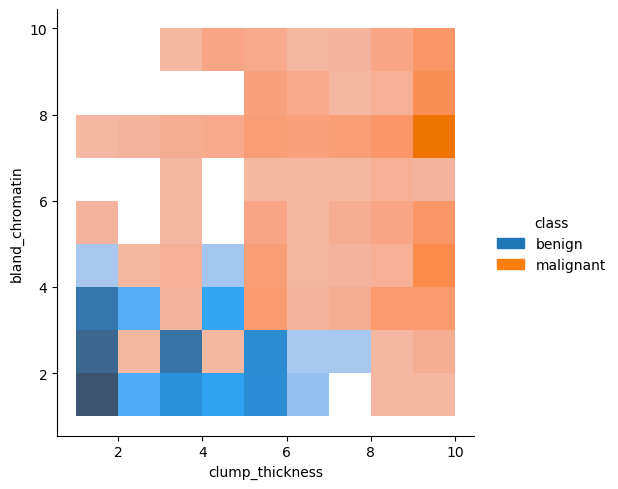

In [15]:
sns.displot(data=bcd2, x='clump_thickness', y='bland_chromatin', hue='class',
             kind='hist', binwidth=1)

/Users/lkcormack/anaconda3/envs/FDSII/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lkcormack/anaconda3/envs/FDSII/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


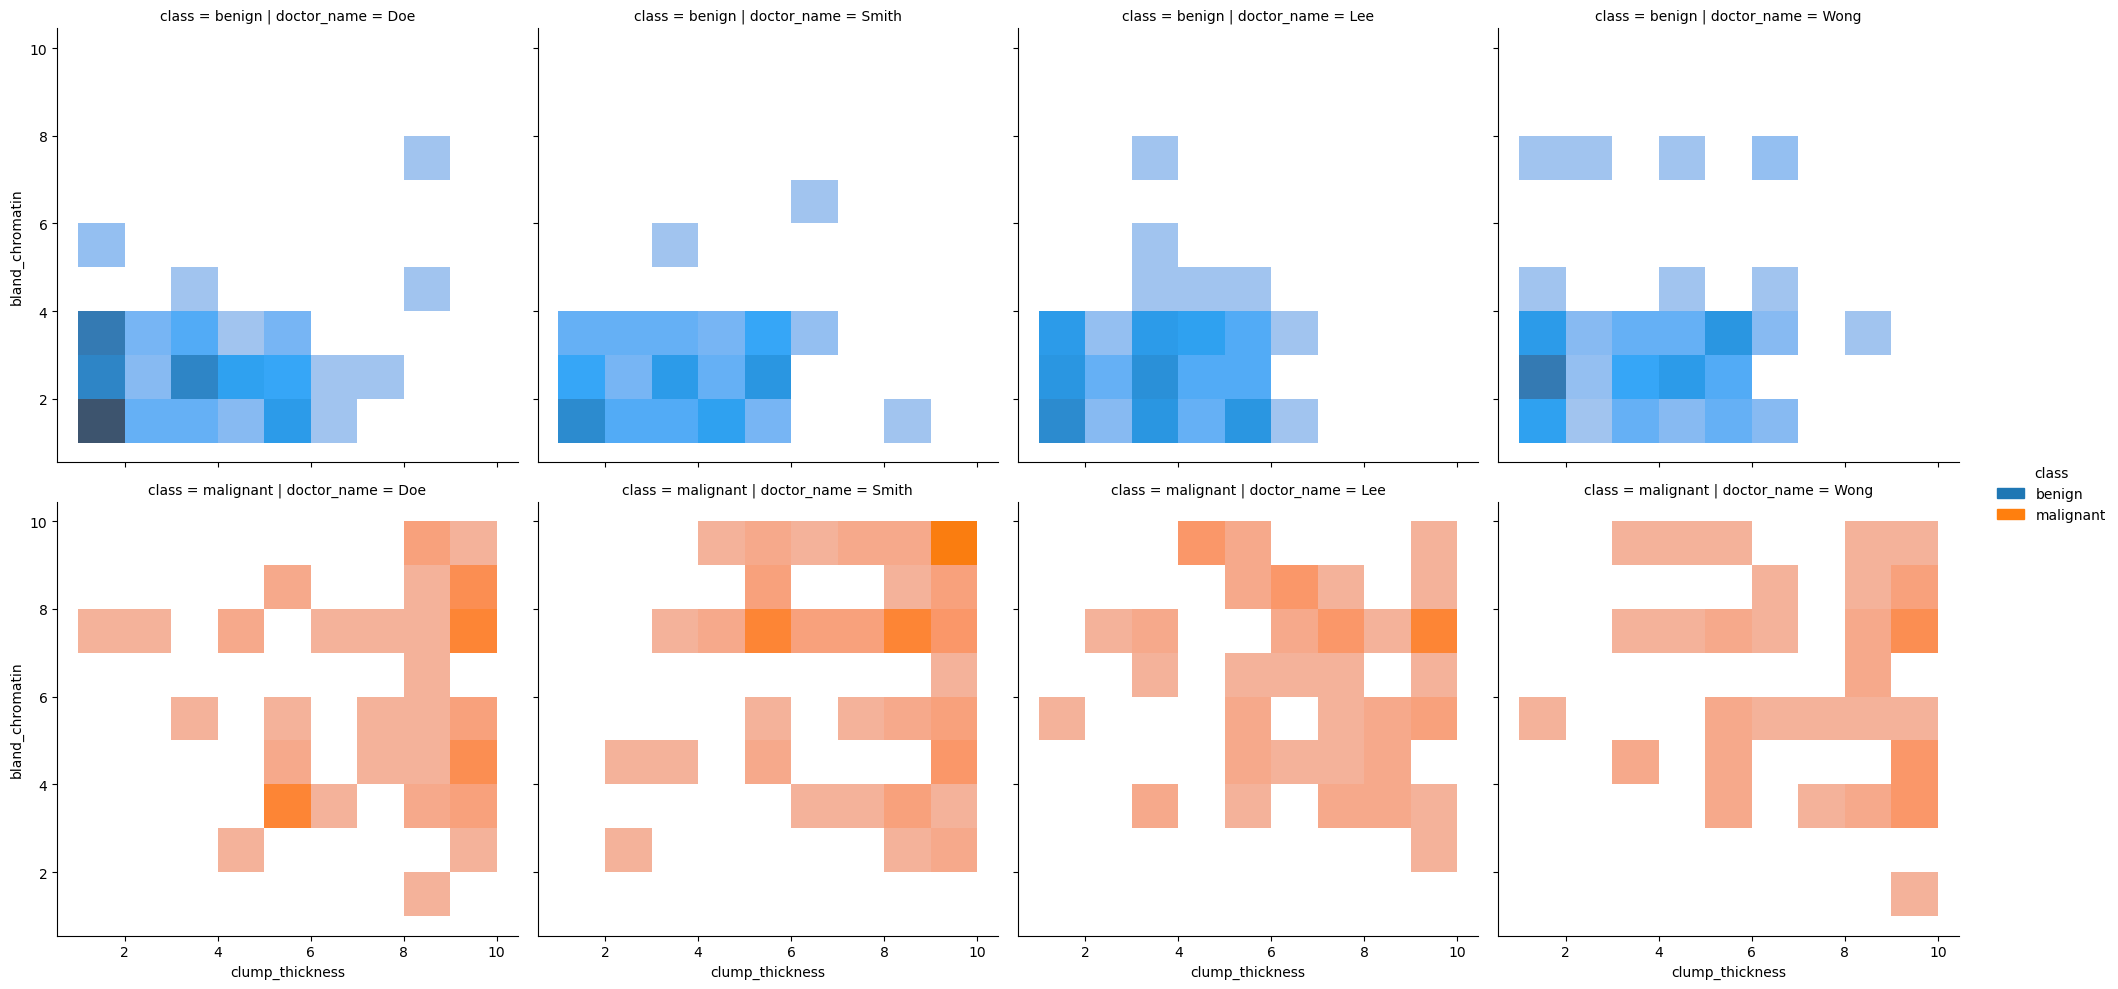

In [17]:
sns.displot(data=bcd2, x='clump_thickness', y='bland_chromatin', hue='class',
             kind='hist', binwidth=1, col='doctor_name', row='class')

In [23]:

wide_df = bcd2.pivot_table(index=bcd2.index, columns='doctor_name', values='clump_thickness')

# Reset the index if you want the index to be a column in the resulting dataframe (optional)
bcd2.reset_index(drop=True, inplace=True)

print(wide_df.head())


doctor_name  Doe  Lee  Smith  Wong
0            5.0  NaN    NaN   NaN
1            NaN  NaN    5.0   NaN
2            NaN  3.0    NaN   NaN
3            NaN  NaN    6.0   NaN
4            NaN  NaN    NaN   4.0


/Users/lkcormack/anaconda3/envs/FDSII/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lkcormack/anaconda3/envs/FDSII/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


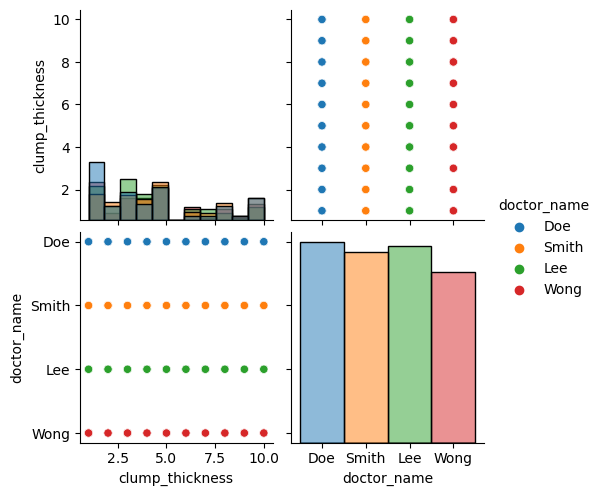

In [21]:
sns.pairplot(data=bcd, vars=['clump_thickness', 'doctor_name'], hue='doctor_name', diag_kind='hist')
